## Logistic Regression On Pima Indians Diabetes DataSet

### About the dataset

The Pima Indian diabetes dataset was performed on 392 female patients of at least 21years old. These females were all of the Pima Indian heritage. 130 of these women tested positive while 262 tested negative. In the dataset,there are 7 independent variable and dependant variable. The variables are:

       Column Name         Definition
     - No_Times_Pregnant:  Number of times pregnant
     - Plasma_Glucose:     Plasma glucose concentration after 2 hours in an oral glucose tolerance test
     - Diastolic_BP:       Diastolic blood pressure (mm Hg)
     - Triceps:            Triceps skin fold thickness (mm)
     - Insulin:            2-Hour serum insulin (mu U/ml)
     - BMI:                Body mass index (weight in kg/(height in m)^2)
     - Age:                Age (years)
     - Diabetes:           Class variable (0 or 1)

In [678]:
#import all the necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

### Import the dataset

In [679]:
pima = pd.read_csv(r"C:\Users\91973\Desktop\Data_Science\Course_2_Machine_Learning_1\Logistic Regression\Pima Indian Diabetes\pima_indian_diabetes.csv")

#### Inspecting the dataset

In [680]:
pima.shape

(392, 8)

In [681]:
pima.head()

,No_Times_Pregnant,Plasma_Glucose,Diastolic_BP,Triceps,Insulin,BMI,Age,Diabetes
0,1,89,66,23,94,28.1,21,0
1,0,137,40,35,168,43.1,33,1
2,3,78,50,32,88,31.0,26,1
3,2,197,70,45,543,30.5,53,1
4,1,189,60,23,846,30.1,59,1


In [682]:
pima.tail()

,No_Times_Pregnant,Plasma_Glucose,Diastolic_BP,Triceps,Insulin,BMI,Age,Diabetes
387,0,181,88,44,510,43.3,26,1
388,1,128,88,39,110,36.5,37,1
389,2,88,58,26,16,28.4,22,0
390,10,101,76,48,180,32.9,63,0
391,5,121,72,23,112,26.2,30,0


In [683]:
pima.describe()

,No_Times_Pregnant,Plasma_Glucose,Diastolic_BP,Triceps,Insulin,BMI,Age,Diabetes
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,3.301020,122.627551,70.663265,29.145408,156.056122,33.086224,30.864796,0.331633
std,3.211424,30.860781,12.496092,10.516424,118.841690,7.027659,10.200777,0.471401
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,76.750000,28.400000,23.000000,0.000000
50%,2.000000,119.000000,70.000000,29.000000,125.500000,33.200000,27.000000,0.000000
75%,5.000000,143.000000,78.000000,37.000000,190.000000,37.100000,36.000000,1.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,81.000000,1.000000


In [684]:
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 8 columns):
No_Times_Pregnant    392 non-null int64
Plasma_Glucose       392 non-null int64
Diastolic_BP         392 non-null int64
Triceps              392 non-null int64
Insulin              392 non-null int64
BMI                  392 non-null float64
Age                  392 non-null int64
Diabetes             392 non-null int64
dtypes: float64(1), int64(7)
memory usage: 24.6 KB


There is no null value present in the dataset

 Check if there is any duplicate value present or not

In [685]:
sum(pima.duplicated())

0

There is no duplicate values

Check if there is any column with unique values

In [686]:
for i in pima.columns:
    if len(pima[i].value_counts())==1:
        print(i)

There is no column with unique values

In [687]:
# Take a copy of the dataset
df1 = pima.copy()

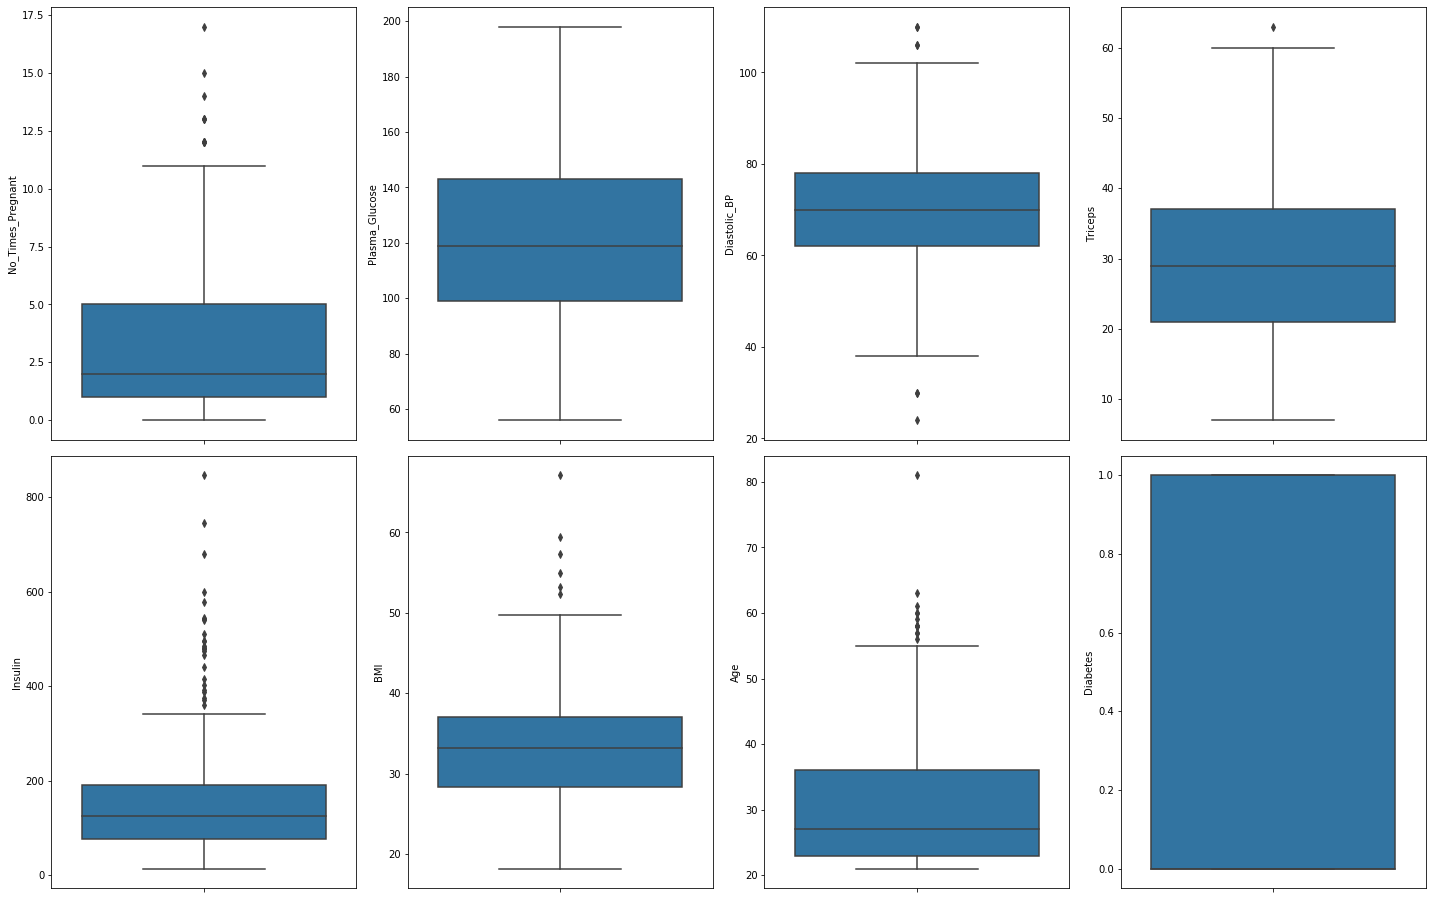

In [688]:
plt.figure(figsize=(20,25))

for i in range(len(df1.columns)):
    
    plt.subplot(4, 4, i+1)
    sns.boxplot(y = list(df1.columns)[i], data = df1)

plt.tight_layout()
plt.show()

#### Checking for balance

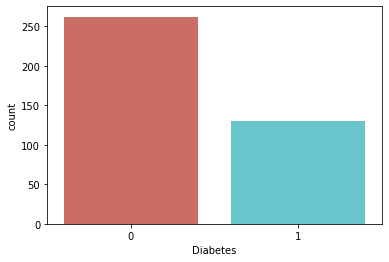

<Figure size 432x288 with 0 Axes>

In [689]:
sns.countplot(x='Diabetes',data=df1,palette='hls')
plt.show()
plt.savefig('count_plot')

In [690]:
df1.Diabetes.value_counts()*100/df1.shape[0]

0    66.836735
1    33.163265
Name: Diabetes, dtype: float64

 - The spread of the dependent variable is not highly imbalanced and we can continue without any further processing

###  Train - Test Split

In [691]:
from sklearn.model_selection import train_test_split

In [692]:
# Store independant variables to X
X = df1.drop(['Diabetes'], axis = 1)
# Store dependant variable to y
y = df1['Diabetes']

In [693]:
X.head()

,No_Times_Pregnant,Plasma_Glucose,Diastolic_BP,Triceps,Insulin,BMI,Age
0,1,89,66,23,94,28.1,21
1,0,137,40,35,168,43.1,33
2,3,78,50,32,88,31.0,26
3,2,197,70,45,543,30.5,53
4,1,189,60,23,846,30.1,59


In [694]:
y.head()

0    0
1    1
2    1
3    1
4    1
Name: Diabetes, dtype: int64

In [695]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

X_train: (274, 7)
X_test: (118, 7)
y_train: (274,)
y_test: (118,)


### Feature Scaling

In [696]:
from sklearn.preprocessing import StandardScaler

In [697]:
col = ['No_Times_Pregnant', 'Plasma_Glucose', 'Diastolic_BP', 'Triceps','Insulin', 'BMI', 'Age']
scale = StandardScaler()
X_train[col] = scale.fit_transform(X_train[col])
X_train.head()

,No_Times_Pregnant,Plasma_Glucose,Diastolic_BP,Triceps,Insulin,BMI,Age
169,1.815945,0.957700,0.567715,0.470846,0.087700,0.124473,0.279158
265,0.873580,0.211296,1.537905,-2.077303,1.358030,-1.912926,3.018166
386,-0.697030,-0.048323,0.567715,0.942726,-0.707281,0.794302,-0.228066
241,0.873580,1.022605,0.567715,1.131478,-0.166366,1.785092,-0.329510
249,-0.697030,0.535819,-0.725872,1.131478,2.620165,1.031534,-0.938179


Looking at Correlations

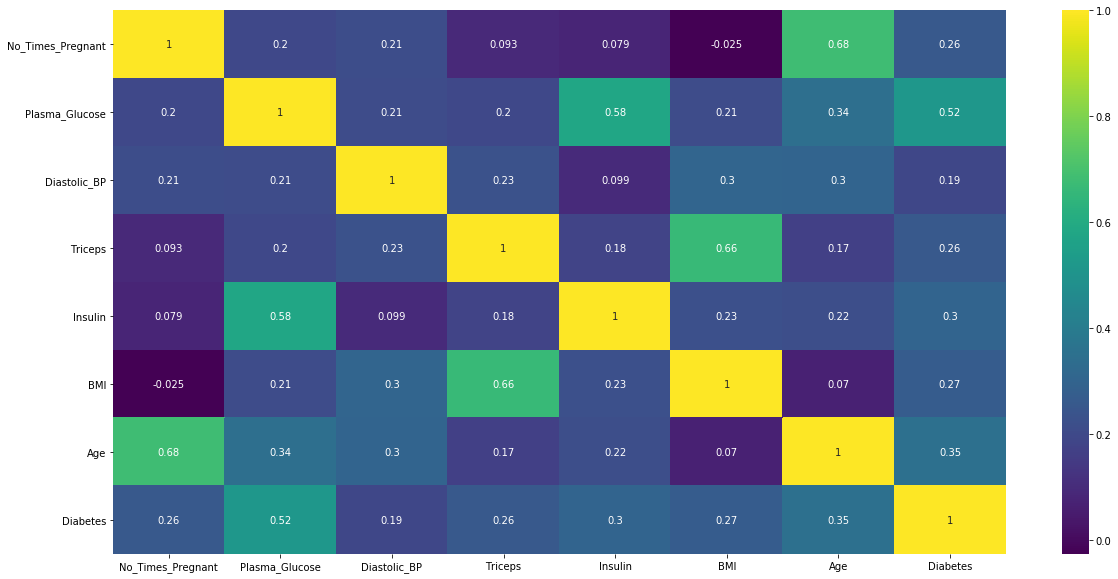

In [698]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(df1.corr(),annot = True,cmap='viridis')
plt.show()

### Model Building

In [699]:
import statsmodels.api as sm

In [700]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Diabetes   No. Observations:                  274
Model:                            GLM   Df Residuals:                      266
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -122.11
Date:                Mon, 20 Apr 2020   Deviance:                       244.22
Time:                        02:12:59   Pearson chi2:                     264.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.9713      0.170     -5.719      0.000      -1.304      -0.638
No_Times_Pregnant     0.2917      0.210      1.386      0.166      -0.121       0.704
Plasma_Glucose        1.2614      0.216      5.851      0.000       0.839       1.684
Diastolic_BP         -0.0746      0.174     -0.429      0.668      -0.415       0.266
Triceps               0.1371      0.205      0.668      0.504      -0.265       0.539
Insulin              -0.1305      0.179     -0.728      0.467      -0.482       0.221
BMI                   0.4634      0.215      2.151      0.031       0.041       0.886
Age                   0.3631      0.224      1.624      0.104      -0.075       0.801
=====================================================================================
"""

Feature Selection Using RFE

In [701]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [702]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 5)             # running RFE with 13 variables as output
rfe = rfe.fit(X_train, y_train)

In [703]:
rfe.support_

array([ True,  True, False,  True, False,  True,  True])

In [704]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('No_Times_Pregnant', True, 1),
 ('Plasma_Glucose', True, 1),
 ('Diastolic_BP', False, 3),
 ('Triceps', True, 1),
 ('Insulin', False, 2),
 ('BMI', True, 1),
 ('Age', True, 1)]

In [705]:
col = X_train.columns[rfe.support_]

In [706]:
X_train_rfe = X_train[col]

In [707]:
X_train.columns[~rfe.support_]

Index(['Diastolic_BP', 'Insulin'], dtype='object')

Assessing the model with StatsModels

In [708]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               Diabetes   No. Observations:                  274
Model:                            GLM   Df Residuals:                      268
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -122.44
Date:                Mon, 20 Apr 2020   Deviance:                       244.88
Time:                        02:12:59   Pearson chi2:                     263.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.9737      0.17

In [709]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

169    0.713460
265    0.361082
386    0.299721
241    0.784368
249    0.433567
178    0.865687
362    0.225039
19     0.945177
26     0.287699
297    0.084591
dtype: float64

In [710]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.71346015, 0.36108196, 0.29972127, 0.78436836, 0.43356732,
       0.86568656, 0.22503869, 0.94517689, 0.28769866, 0.08459107])

In [711]:
y_train_pred_final = pd.DataFrame({'Diabetes':y_train.values, 'db_Prob':y_train_pred})
y_train_pred_final['ID'] = y_train.index
y_train_pred_final.head()

,Diabetes,db_Prob,ID
0,1,0.713460,169
1,0,0.361082,265
2,0,0.299721,386
3,0,0.784368,241
4,0,0.433567,249


In [712]:
y_train_pred_final['predicted'] = y_train_pred_final.db_Prob.map(lambda x: 1 if x > 0.5 else 0)
# Let's see the head
y_train_pred_final.head()

,Diabetes,db_Prob,ID,predicted
0,1,0.713460,169,1
1,0,0.361082,265,0
2,0,0.299721,386,0
3,0,0.784368,241,1
4,0,0.433567,249,0


Checking the VIFs

In [713]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [714]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Age,2.02
0,No_Times_Pregnant,1.84
2,Triceps,1.77
3,BMI,1.76
1,Plasma_Glucose,1.17


In [715]:
X = X_train_rfe.drop(['Triceps'],axis=1) #BMI has very high p value

In [716]:
X_train_sm = sm.add_constant(X)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               Diabetes   No. Observations:                  274
Model:                            GLM   Df Residuals:                      269
Model Family:                Binomial   Df Model:                            4
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -122.69
Date:                Mon, 20 Apr 2020   Deviance:                       245.38
Time:                        02:13:00   Pearson chi2:                     266.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.9638      0.16

In [717]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Age,2.00
0,No_Times_Pregnant,1.84
1,Plasma_Glucose,1.17
2,BMI,1.04


In [718]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [719]:
y_train_pred[:10]

array([0.70380105, 0.41001278, 0.2873188 , 0.78316236, 0.41327589,
       0.85954731, 0.24567127, 0.95779998, 0.24079169, 0.09914579])

In [720]:
y_train_pred_final['db_Prob'] = y_train_pred

In [721]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.db_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Diabetes,db_Prob,ID,predicted
0,1,0.703801,169,1
1,0,0.410013,265,0
2,0,0.287319,386,0
3,0,0.783162,241,1
4,0,0.413276,249,0


In [722]:
#Preserving the columns for future uses
col_1 = X.columns
col_1

Index(['No_Times_Pregnant', 'Plasma_Glucose', 'BMI', 'Age'], dtype='object')

In [723]:
from sklearn import metrics

In [724]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Diabetes, y_train_pred_final.predicted )
print(confusion)

[[161  21]
 [ 40  52]]


In [725]:
# Predicted     not_churn    churn
# Actual
# not_churn        161      21
# churn            40       52  

In [726]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Diabetes, y_train_pred_final.predicted))

0.7773722627737226


Metrics beyond simply accuracy

In [727]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [728]:
print('TP: '+str(TP))
print('TN: '+str(TN))
print('FP: '+str(FP))
print('FN: '+str(FN))

TP: 52
TN: 161
FP: 21
FN: 40


In [729]:
# Sensitivity
TP / float(TP+FN)

0.5652173913043478

In [730]:
#Specificity
TN/float(TN+FP)

0.8846153846153846

In [731]:
#false postive rate(FPR)
print(FP/ float(TN+FP))

0.11538461538461539


In [732]:
#Precision - Same as positive predictive value 
print (TP / float(TP+FP))

0.7123287671232876


In [733]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8009950248756219


In [734]:
#Recall
print(TP/float(TP+FN))

0.5652173913043478


#### Plotting the ROC Curve

In [735]:
from sklearn.metrics import roc_curve,roc_auc_score

In [736]:
def draw_roc(actual,pred):
    fpr,tpr,threshold = roc_curve(actual,pred,drop_intermediate=False)
    auc_score = roc_auc_score(actual,pred)
    plt.plot(fpr,tpr,label='ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0,1],[0,1],'k--')
    plt.legend(loc="lower right")
    plt.show()
    return None

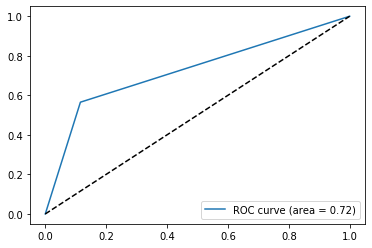

In [737]:
draw_roc(y_train_pred_final.Diabetes,y_train_pred_final.predicted)

From the above graph, we can see that AUC is 0.72

Finding Optimal Cutoff Point

In [738]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.db_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Diabetes,db_Prob,ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.703801,169,1,1,1,1,1,1,1,1,1,0,0
1,0,0.410013,265,0,1,1,1,1,1,0,0,0,0,0
2,0,0.287319,386,0,1,1,1,0,0,0,0,0,0,0
3,0,0.783162,241,1,1,1,1,1,1,1,1,1,0,0
4,0,0.413276,249,0,1,1,1,1,1,0,0,0,0,0


In [739]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Diabetes, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.335766  1.000000  0.000000
0.1   0.1  0.540146  0.945652  0.335165
0.2   0.2  0.726277  0.902174  0.637363
0.3   0.3  0.755474  0.760870  0.752747
0.4   0.4  0.799270  0.684783  0.857143
0.5   0.5  0.777372  0.565217  0.884615
0.6   0.6  0.773723  0.510870  0.906593
0.7   0.7  0.784672  0.467391  0.945055
0.8   0.8  0.733577  0.239130  0.983516
0.9   0.9  0.689781  0.086957  0.994505


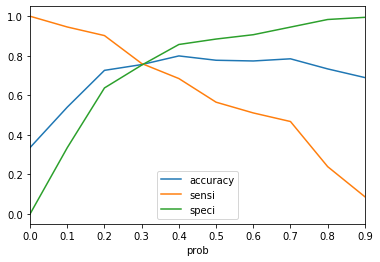

In [740]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [741]:
y_train_pred_final['final_predicted'] = y_train_pred_final.db_Prob.map( lambda x: 1 if x > 0.3 else 0)
y_train_pred_final.head()

,Diabetes,db_Prob,ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.703801,169,1,1,1,1,1,1,1,1,1,0,0,1
1,0,0.410013,265,0,1,1,1,1,1,0,0,0,0,0,1
2,0,0.287319,386,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.783162,241,1,1,1,1,1,1,1,1,1,0,0,1
4,0,0.413276,249,0,1,1,1,1,1,0,0,0,0,0,1


In [742]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Diabetes, y_train_pred_final.final_predicted)

0.7554744525547445

In [743]:
confusion1 = metrics.confusion_matrix(y_train_pred_final.Diabetes, y_train_pred_final.final_predicted)
confusion1

array([[137,  45],
       [ 22,  70]], dtype=int64)

In [744]:
TP = confusion1[1,1] # true positive 
TN = confusion1[0,0] # true negatives
FP = confusion1[0,1] # false positives
FN = confusion1[1,0] # false negatives

In [745]:
# Check the sensitivity 
TP / float(TP+FN)

0.7608695652173914

In [746]:
# calculate specificity
TN / float(TN+FP)

0.7527472527472527

In [747]:
# Calculate false postive rate 
print(FP/ float(TN+FP))

0.24725274725274726


In [748]:
#Precision
Precision = TP / float(TP+FP)
print (Precision)

0.6086956521739131


In [749]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8616352201257862


In [750]:
#Recall
Recall = TP/float(TP+FN)
print(Recall)

0.7608695652173914


Find out the same metrics using sklearn utilities

In [751]:
from sklearn.metrics import precision_score, recall_score

In [752]:
precision_score(y_train_pred_final.Diabetes, y_train_pred_final.final_predicted)

0.6086956521739131

In [753]:
recall_score(y_train_pred_final.Diabetes, y_train_pred_final.final_predicted)

0.7608695652173914

Precision and recall tradeoff

In [754]:
from sklearn.metrics import precision_recall_curve

In [755]:
y_train_pred_final.Diabetes, y_train_pred_final.final_predicted

(0      1
 1      0
 2      0
 3      0
 4      0
 5      1
 6      0
 7      1
 8      0
 9      0
 10     0
 11     0
 12     0
 13     0
 14     1
 15     1
 16     0
 17     1
 18     0
 19     1
 20     0
 21     0
 22     0
 23     0
 24     0
 25     0
 26     1
 27     0
 28     1
 29     0
       ..
 244    1
 245    0
 246    1
 247    1
 248    1
 249    0
 250    1
 251    1
 252    1
 253    0
 254    0
 255    1
 256    1
 257    1
 258    0
 259    0
 260    0
 261    0
 262    1
 263    0
 264    0
 265    1
 266    1
 267    0
 268    0
 269    0
 270    0
 271    0
 272    1
 273    1
 Name: Diabetes, Length: 274, dtype: int64, 0      1
 1      1
 2      0
 3      1
 4      1
 5      1
 6      0
 7      1
 8      0
 9      0
 10     0
 11     0
 12     1
 13     1
 14     1
 15     1
 16     0
 17     1
 18     1
 19     1
 20     0
 21     0
 22     0
 23     1
 24     0
 25     0
 26     0
 27     0
 28     1
 29     0
       ..
 244    1
 245    0
 246    1
 247   

In [756]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Diabetes, y_train_pred_final.db_Prob)

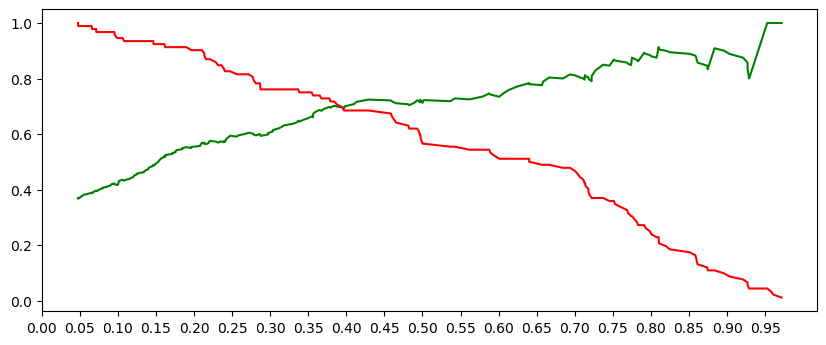

In [757]:
# Slightly alter the figure size to make it more horizontal.
plt.figure(figsize=(10, 4), dpi=100, facecolor='w', edgecolor='k', frameon='True')
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.xticks(np.arange(0, 1, step=0.05))
plt.show()

From the precision-recall graph above,the threshold value as close to 0.40. However we have got this with our previous threshold value of 0.3.

In [758]:
#Calculating the F1 score
F1 = 2*(Precision*Recall)/(Precision+Recall)
F1

0.6763285024154589

Find out F1 score using sklearn utilities

In [759]:
from sklearn.metrics import f1_score

In [760]:
f1_score(y_train_pred_final.Diabetes, y_train_pred_final.final_predicted)

0.6763285024154589

### Making predictions on the test set

In [761]:
col = ['No_Times_Pregnant', 'Plasma_Glucose', 'Diastolic_BP', 'Triceps','Insulin', 'BMI', 'Age']
X_test[col] = scale.transform(X_test[col])

In [762]:
X_test.head()

,No_Times_Pregnant,Plasma_Glucose,Diastolic_BP,Triceps,Insulin,BMI,Age
124,2.444189,1.055057,0.406016,-0.095409,-0.084410,-0.001120,2.105163
140,-1.011151,-0.502656,-0.725872,0.093343,-0.707281,0.459388,-0.532400
276,1.501824,-0.729823,0.244318,1.037102,0.448310,0.850122,1.293605
252,0.245336,0.081486,-0.079079,-1.039168,-0.313889,-0.615131,1.496495
326,-0.697030,-0.729823,0.244318,-1.605424,-0.936760,-1.926881,-0.228066


In [763]:
X_test = X_test[col_1]
X_test.head()

,No_Times_Pregnant,Plasma_Glucose,BMI,Age
124,2.444189,1.055057,-0.001120,2.105163
140,-1.011151,-0.502656,0.459388,-0.532400
276,1.501824,-0.729823,0.850122,1.293605
252,0.245336,0.081486,-0.615131,1.496495
326,-0.697030,-0.729823,-1.926881,-0.228066


Adding the constant

In [764]:
X_test_sm = sm.add_constant(X_test)

Making predictions on the test setm

In [765]:
y_test_pred = res.predict(X_test_sm)

In [766]:
y_test_pred[:10]

124    0.851006
140    0.140452
276    0.379527
252    0.358502
326    0.043894
136    0.381073
369    0.142801
132    0.602169
387    0.820167
174    0.055185
dtype: float64

In [767]:
# Converting y_pred to a dataframe
y_pred_1 = pd.DataFrame(y_test_pred)

In [768]:
y_pred_1.head()

,0
124,0.851006
140,0.140452
276,0.379527
252,0.358502
326,0.043894


In [769]:
# Convert y_test to a dataframe
y_test_df = pd.DataFrame(y_test)

In [770]:
# Putting ID to index
y_test_df['ID'] = y_test_df.index

In [771]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [772]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [773]:
y_pred_final.head()

,Diabetes,ID,0
0,1,124,0.851006
1,1,140,0.140452
2,1,276,0.379527
3,1,252,0.358502
4,0,326,0.043894


In [774]:
# Rename the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'db_Prob'})

In [775]:
# Rearrange the columns
y_pred_final = y_pred_final.reindex_axis(['ID','Diabetes','db_Prob'], axis=1)

Use probability threshold value of 0.30 on the test dataset to predict if a lead will convert or not

In [776]:
y_pred_final['final_predicted'] = y_pred_final.db_Prob.map(lambda x: 1 if x > 0.30 else 0)

In [777]:
y_pred_final.head()

,ID,Diabetes,db_Prob,final_predicted
0,124,1,0.851006,1
1,140,1,0.140452,0
2,276,1,0.379527,1
3,252,1,0.358502,1
4,326,0,0.043894,0


In [778]:
# check the overall accuracy.
acc_score=metrics.accuracy_score(y_pred_final.Diabetes, y_pred_final.final_predicted)
acc_score

0.7372881355932204

In [780]:
confusion_test = metrics.confusion_matrix(y_pred_final.Diabetes, y_pred_final.final_predicted )
print(confusion_test)

[[58 22]
 [ 9 29]]


In [781]:
TP = confusion_test[1,1] # true positive 
TN = confusion_test[0,0] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives


In [782]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7631578947368421

In [783]:
# Let us calculate specificity
TN / float(TN+FP)

0.725

In [784]:
#False Postive Rate
print(FP/ float(TN+FP))

0.275


In [785]:
Precision = confusion_test[1,1]/(confusion_test[0,1]+confusion_test[1,1])
Precision

0.5686274509803921

In [786]:
Recall = confusion_test[1,1]/(confusion_test[1,0]+confusion_test[1,1])
Recall

0.7631578947368421

ROC Curve on test dataset

In [788]:
def draw_roc(actual,pred):
    fpr,tpr,threshold = roc_curve(actual,pred,drop_intermediate=False)
    auc_score = roc_auc_score(actual,pred)
    plt.plot(fpr,tpr,label='ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0,1],[0,1],'k--')
    plt.legend(loc="lower right")
    plt.show()
    return None

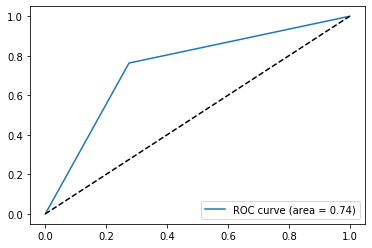

In [790]:
draw_roc(y_pred_final.Diabetes,y_pred_final.final_predicted)

From the above graph, we can see that AUC is 0.74

Calculate patient score

In [792]:
#Test dataset wirh diabetes Probability and the final predicted value for those who have diabetes
cust_test_pred = y_pred_final.copy()

In [793]:
#Train dataset along with the patient Probability and final predicted value for patient
cust_train_pred = y_train_pred_final.copy()
cust_train_pred.head()

,Diabetes,db_Prob,ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.703801,169,1,1,1,1,1,1,1,1,1,0,0,1
1,0,0.410013,265,0,1,1,1,1,1,0,0,0,0,0,1
2,0,0.287319,386,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.783162,241,1,1,1,1,1,1,1,1,1,0,0,1
4,0,0.413276,249,0,1,1,1,1,1,0,0,0,0,0,1


In [794]:
# Drop columns from train dataset
cust_train_pred = cust_train_pred[['ID','Diabetes','db_Prob','final_predicted']]
cust_train_pred.head()

,ID,Diabetes,db_Prob,final_predicted
0,169,1,0.703801,1
1,265,0,0.410013,1
2,386,0,0.287319,0
3,241,0,0.783162,1
4,249,0,0.413276,1


Concatenate the train and the test dataset with the Conversion Probabilities

In [795]:
cust_full_pred = cust_train_pred.append(cust_test_pred)
cust_full_pred.head()

,ID,Diabetes,db_Prob,final_predicted
0,169,1,0.703801,1
1,265,0,0.410013,1
2,386,0,0.287319,0
3,241,0,0.783162,1
4,249,0,0.413276,1


In [796]:
print(cust_train_pred.shape)
print(cust_test_pred.shape)
print(cust_full_pred.shape)

(274, 4)
(118, 4)
(392, 4)


In [798]:
# Ensuring the patient ids are unique for each customer in the final dataframe
len(cust_full_pred['ID'].unique().tolist())

392

In [799]:
# Calculate the patient's db Score values
# db_score = 100 * db_Prob.This needs to be calculated for all the customer from the original dataset (train + test)
cust_full_pred['db_Score'] = cust_full_pred['db_Prob'].apply(lambda x : round(x*100))
cust_full_pred.head()

,ID,Diabetes,db_Prob,final_predicted,db_Score
0,169,1,0.703801,1,70
1,265,0,0.410013,1,41
2,386,0,0.287319,0,29
3,241,0,0.783162,1,78
4,249,0,0.413276,1,41


In [800]:
# Convert the Id column as index
cust_full_pred = cust_full_pred.set_index('ID').sort_index(axis = 0, ascending = True)
cust_full_pred.head()

,Diabetes,db_Prob,final_predicted,db_Score
ID,,,,
0,0,0.041339,0,4
1,1,0.518339,1,52
2,1,0.047696,0,5
3,1,0.914681,1,91
4,1,0.896373,1,90


In [802]:
pd.set_option('display.max_rows', None)

In [803]:
cust_full_pred

,Diabetes,db_Prob,final_predicted,db_Score
ID,,,,
0,0,0.041339,0,4
1,1,0.518339,1,52
2,1,0.047696,0,5
3,1,0.914681,1,91
4,1,0.896373,1,90
5,1,0.744672,1,74
6,1,0.370005,1,37
7,0,0.246893,0,25
8,1,0.213319,0,21
